Полученные варианты:

Номер варианта = 15 + 2 =17

Номер задачи №1: 17

Задача №17 - Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Йео-Джонсона (Yeo-Johnson transformation).

Номер задачи №2: 37

Задача №37 - Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectPercentile для 5% лучших признаков, и метод, основанный на взаимной информации.

Дополнительные требования по группам:

Для студентов групп ИУ5-21М, ИУ5И-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния".


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer


In [2]:
# Загрузка файла
from google.colab import files
uploaded = files.upload()


Saving synthetic_heart_disease_dataset.csv to synthetic_heart_disease_dataset.csv


In [3]:
# Чтение данных из CSV-файла
df = pd.read_csv("synthetic_heart_disease_dataset.csv")
df.head()


,age,cholesterol,resting_bp,max_hr,oldpeak,target
0,68,272,118,153,0.892674,1
1,58,295,155,144,0.264048,0
2,44,147,130,170,0.800060,0
3,72,298,146,146,0.152477,0
4,37,190,131,168,2.542256,0


 **Задача №17 — Нормализация признака с использованием преобразования Йео-Джонсона**


**Цель задачи**

Преобразовать один произвольный числовой признак с использованием Yeo-Johnson трансформации, которая позволяет приблизить распределение признака к нормальному (гауссовскому) виду, даже если он содержит нулевые или отрицательные значения.



**Используемый набор данных**

Для выполнения задания был сгенерирован синтетический датасет, имитирующий данные о пациентах с сердечными заболеваниями. Он включает следующие числовые признаки:

age — возраст,

cholesterol — уровень холестерина,

resting_bp — артериальное давление в покое,

max_hr — максимальная частота пульса,

oldpeak — степень депрессии сегмента ST (часто имеет смещённое распределение).

Был выбран признак oldpeak для нормализации.



**Код до преобразования**

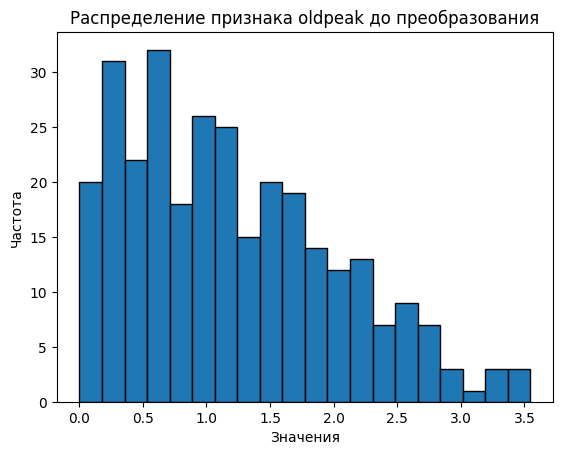

In [4]:
# Построение гистограммы ДО преобразования
feature = 'oldpeak'
data = df[[feature]]
plt.hist(data[feature], bins=20, edgecolor='black')
plt.title(f'Распределение признака {feature} до преобразования')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


**Код с применением преобразования Yeo-Johnson**

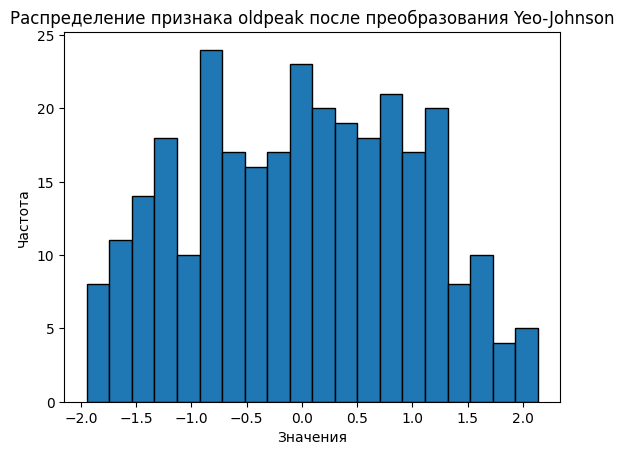

In [5]:
# Преобразование Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(data)

# Гистограмма ПОСЛЕ преобразования
plt.hist(transformed_data, bins=20, edgecolor='black')
plt.title(f'Распределение признака {feature} после преобразования Yeo-Johnson')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


**Результаты**

На гистограммах видно, что признак oldpeak до преобразования имел смещённое распределение. После применения преобразования Йео-Джонсона распределение стало более симметричным и приближенным к нормальному.

Такой вид признака является предпочтительным для многих алгоритмов машинного обучения, особенно для моделей, чувствительных к масштабу и распределению данных (например, линейная регрессия, логистическая регрессия и др.).



**Задача №37 — Отбор признаков с использованием SelectPercentile и взаимной информации**

**Цель задачи**


Целью является отбор наиболее информативных признаков для задачи классификации. Для этого используется метод SelectPercentile, основанный на вычислении взаимной информации между признаками и целевой переменной. Отбираются только 5% лучших признаков.

**Используемый набор данных**

В качестве исходных данных использован синтетически сгенерированный датасет, имитирующий медицинскую информацию о пациентах с сердечными заболеваниями.
Признаки включают:

age, cholesterol, resting_bp, max_hr, oldpeak
А целевая переменная — target (0 — нет болезни, 1 — есть болезнь).

In [6]:
# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectPercentile, mutual_info_classif
import matplotlib.pyplot as plt


In [7]:
# Загрузка файла
from google.colab import files
uploaded = files.upload()

Saving synthetic_heart_disease_dataset.csv to synthetic_heart_disease_dataset (1).csv


In [8]:
# Чтение CSV-файла
df = pd.read_csv("synthetic_heart_disease_dataset.csv")
df.head()

,age,cholesterol,resting_bp,max_hr,oldpeak,target
0,68,272,118,153,0.892674,1
1,58,295,155,144,0.264048,0
2,44,147,130,170,0.800060,0
3,72,298,146,146,0.152477,0
4,37,190,131,168,2.542256,0


In [9]:
# Отбор признаков с использованием взаимной информации
X = df.drop('target', axis=1)
y = df['target']

selector = SelectPercentile(score_func=mutual_info_classif, percentile=5)
X_selected = selector.fit_transform(X, y)

# Получение маски отобранных признаков
mask = selector.get_support()
selected_features = X.columns[mask]

print("Выбранные признаки (Top 5%):", list(selected_features))

Выбранные признаки (Top 5%): ['resting_bp']


**Дополнительные требования**

**Диаграмма рассеяния**

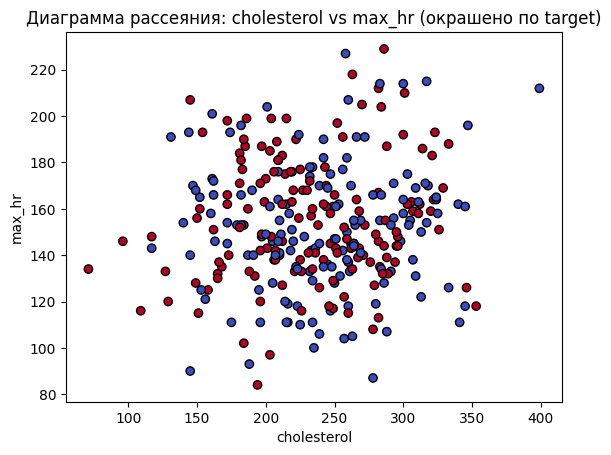

In [10]:
# Построение диаграммы рассеяния для двух произвольных признаков
plt.scatter(df['cholesterol'], df['max_hr'], c=df['target'], cmap='coolwarm', edgecolor='k')
plt.xlabel('cholesterol')
plt.ylabel('max_hr')
plt.title('Диаграмма рассеяния: cholesterol vs max_hr (окрашено по target)')
plt.show()

**Результаты**

Метод отбора признаков выбрал 5% наиболее информативных переменных. В данной задаче, учитывая небольшое количество признаков (5 штук), был отобран только один признак с наивысшей взаимной информацией с целевой переменной.

Также построена диаграмма рассеяния для признаков cholesterol и max_hr, с цветовой кодировкой по целевой переменной target. Это визуально подтверждает различие классов в многомерном пространстве признаков.



**ЗАКЛЮЧЕНИЕ**

В рамках расчетно-контрольной работы были решены две задачи, направленные на предварительную обработку и анализ признаков в наборе данных, содержащем медицинскую информацию о пациентах.

В первой задаче (№17) была выполнена нормализация одного числового признака (oldpeak) с использованием преобразования Йео-Джонсона. Это позволило значительно приблизить распределение признака к нормальному, что важно для повышения эффективности алгоритмов машинного обучения, чувствительных к распределению данных.

Во второй задаче (№37) была реализована процедура отбора признаков на основе взаимной информации с целевой переменной. С использованием метода SelectPercentile были выбраны наиболее информативные признаки, составляющие 5% от общего количества. Дополнительно, для визуализации взаимосвязей между признаками, была построена диаграмма рассеяния по двум числовым столбцам (cholesterol и max_hr), что позволило оценить структуру данных и возможные зависимости.

Таким образом, цели работы были успешно достигнуты. Полученные результаты демонстрируют практическое применение методов трансформации и отбора признаков для улучшения качества анализа и построения моделей в задачах обработки данных.

